<a href="https://colab.research.google.com/github/SimranaSinha/Masters-Project-FDA/blob/main/Simran_Sinha_Project_3_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

Libraries

In [21]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the dataset

Mounting Google Drive into the Colab environment will enable easy file handling and facilitate operations such as reading, writing, and manipulation.

In [23]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
data= pd.read_csv('/content/drive/MyDrive/Research/Datasets/Project3_Keywords.csv')

In [25]:
data.head()

,Authors,Article Title,Author Keywords,Abstract,Affiliations,Reprint Addresses,ISBN,Publication Year,Volume,DOI
0,"Tortora, L",Beyond Discrimination: Generative AI Applicati...,forensic psychiatry; forensic AI; generative A...,The advent and growing popularity of generativ...,Trinity College Dublin,"Tortora, L (corresponding author), Trinity Col...",NaN,2024,15.0,10.3389/fpsyt.2024.1346059
1,"Vigeant, L",Generative AI and Argument Creativity,arguments; creativity; generative AI; universa...,Generative AI appears to threaten argument cre...,NaN,NaN,NaN,2024,44.0,NaN
2,"Basole, RC; Major, T",Generative AI for Visualization: Opportunities...,Generative AI; Art; Artificial intelligence; M...,Recent developments in artificial intelligence...,NaN,"Basole, RC (corresponding author), Accenture D...",NaN,2024,44.0,10.1109/MCG.2024.3362168
3,"Sauvola, J; Tarkoma, S; Klemettinen, M; Riekki...",Future of software development with generative AI,Software development; Generative AI; Real-time...,Generative AI is regarded as a major disruptio...,University of Oulu; University of Helsinki; St...,"Sauvola, J (corresponding author), Univ Oulu, ...",NaN,2024,31.0,10.1007/s10515-024-00426-z
4,"Dale, R",A year's a long time in generative AI,Generative AI; NLP industry,A lot has happened since OpenAI released ChatG...,NaN,"Dale, R (corresponding author), Language Techn...",NaN,2024,NaN,10.1017/S1351324923000554


In [26]:
data.describe()

,Publication Year,Volume
count,210.0,128.000000
mean,2024.0,595.070312
std,0.0,2801.481473
min,2024.0,3.000000
25%,2024.0,12.000000
50%,2024.0,16.000000
75%,2024.0,44.000000
max,2024.0,14496.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            210 non-null    object 
 1   Article Title      210 non-null    object 
 2   Author Keywords    210 non-null    object 
 3   Abstract           205 non-null    object 
 4   Affiliations       193 non-null    object 
 5   Reprint Addresses  207 non-null    object 
 6   ISBN               22 non-null     object 
 7   Publication Year   210 non-null    int64  
 8   Volume             128 non-null    float64
 9   DOI                209 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 16.5+ KB


In [28]:
data.isna().sum()

Authors                0
Article Title          0
Author Keywords        0
Abstract               5
Affiliations          17
Reprint Addresses      3
ISBN                 188
Publication Year       0
Volume                82
DOI                    1
dtype: int64

In [31]:
'Author Keywords' in data.columns

True

In [33]:
Splitting_columns = data['Author Keywords'].str.split(';', expand=True)

In [ ]:
Splitting_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,forensic psychiatry,forensic AI,generative AI,generative artificial intelligence,discriminative AI,ethical AI,large language models,large generative AI models,None,None,...,None,None,None,None,None,None,None,None,None,None
1,HCI,AI,Generative AI,Human-AI Interaction,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,artificial intelligence,AI,generative artificial intelligence,generative AI,GAI,GenAI,Gen-AI,ChatGPT,LLM,GPT,...,AI education,AI ethics,AI security,None,None,None,None,None,None,None
3,AI deployment,generative AI,political philosophy of AI,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generative AI,education,culture,AI writing,hype,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Converting all the words in the expanded keywords dataframe to lower case.

In [34]:
lowercase = Splitting_columns.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [35]:
# Previewing the dataframe with all words in lower case.
lowercase.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,forensic psychiatry,forensic ai,generative ai,generative artificial intelligence,discriminative ai,ethical ai,large language models,large generative ai models,None,None,...,None,None,None,None,None,None,None,None,None,None
1,arguments,creativity,generative ai,universal audience,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,generative ai,art,artificial intelligence,machine learning,visualization,media,augmented reality,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,software development,generative ai,real-time digital economy,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,generative ai,nlp industry,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


**Calculating frequency distribution**

Now converting a dataframe to a list of words, counts the frequency of each word, and displays the frequency distribution in a DataFrame. This approach enables simple examination of word frequencies inside the dataframe.

In [36]:
# Flatten the dataframe to a single list of all words, excluding None values
Every_words = lowercase.stack().tolist()

# Calculate the frequency distribution
word_freq = Counter(Every_words)

# Convert the Counter object to a dataframe for better readability
frequency_words = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
frequency_words.head()

,Word,Frequency
2,generative ai,165
62,chatgpt,55
12,artificial intelligence,47
6,large language models,30
20,ai,18


# **TASK 1** Co-occurrence Network Subgraph

Now, designing a graph in which each term in the dataframe represents a node, and the edges between nodes reflect associations between keywords in the same row of the dataframe. Each edge's weight indicates the frequency with which the associated pair of terms co-occur.

Plotting the graph

In [37]:
# Initialize an undirected graph
S = nx.Graph()

# Loop over each row of the dataframe and add edges between every pair of keywords inside a row.
for index, row in lowercase.iterrows():
    # Filter out None values and convert to a list
    keywords_list = [keyword for keyword in row if keyword is not None]

    #Include nodes and edges for each keyword on the list.
    for i in range(len(keywords_list)):
        for j in range(i + 1, len(keywords_list)):
            # If the edge already exists, increment the weight
            if S.has_edge(keywords_list[i], keywords_list[j]):
                S[keywords_list[i]][keywords_list[j]]['weight'] += 1
            else:
                S.add_edge(keywords_list[i], keywords_list[j], weight=1)

# Let's obtain some fundamental information about the graph in order to comprehend its size and complexity.
print(S)

Graph with 857 nodes and 4348 edges


Creating a clean and informative depiction of the co-occurrence network subgraph, emphasizing the most linked nodes for ease of understanding.


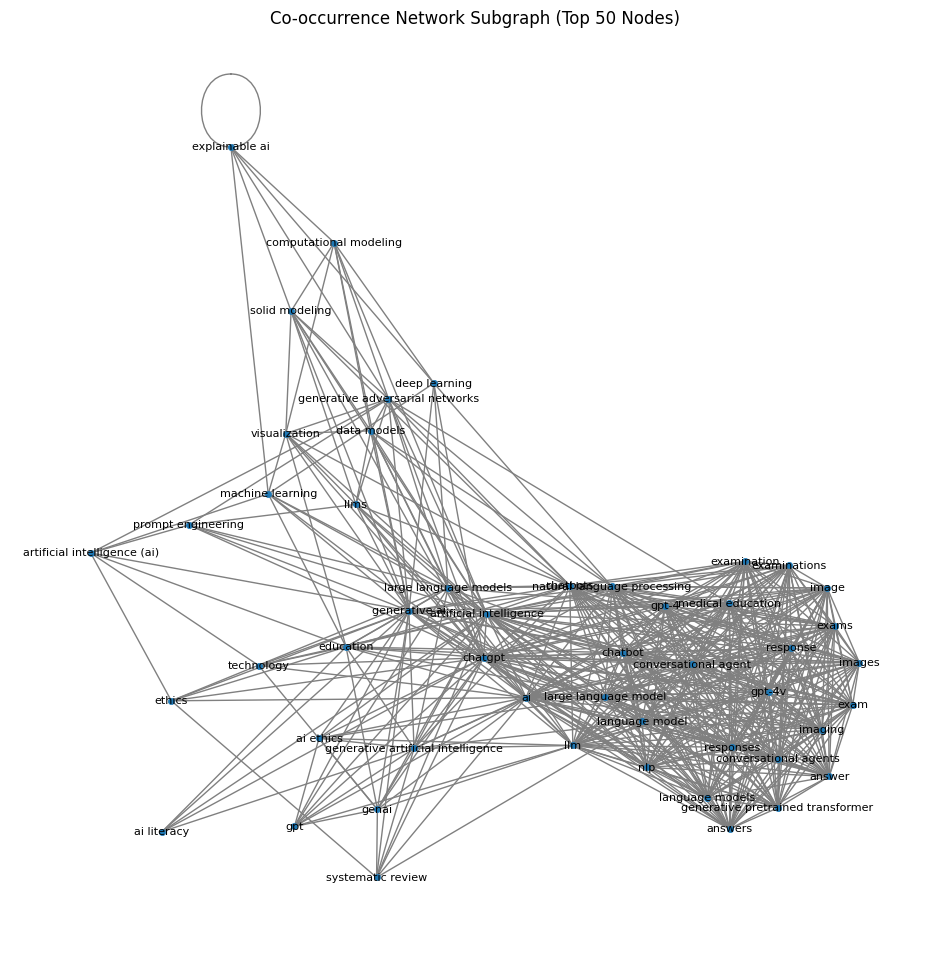

In [38]:
# Since the graph is large, plotting it directly may not be very informative due to overplotting.
# For demonstration, we'll plot a smaller subgraph of the 50 most connected nodes.
subgraph_nodes = sorted(S.degree, key=lambda x: x[1], reverse=True)[:50]
subgraph = S.subgraph([node[0] for node in subgraph_nodes])

# Plotting the subgraph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)  # For consistent layout
nx.draw_networkx(subgraph, pos, node_size=20, with_labels=True, font_size=8, edge_color="gray", linewidths=0.5)
plt.title("Co-occurrence Network Subgraph (Top 50 Nodes)")
plt.axis('off')  # Turn off the axis
plt.show()

# **TASK 2** Identification of Key Research Themes

Using NetworkX's **nx.adjacency_matrix()** function, construct the adjacency matrix of the graph S. The adjacency matrix is then transformed into a dense matrix using the **todense()** technique. This dense matrix is transformed to a DataFrame called **adj_matrix_df**, with row and column indices indicating the graph's nodes. A tiny piece **(10x10)** of the adjacency matrix DataFrame is shown to give an idea of the connectedness between nodes in the network.



In [39]:
# Calculating the adjacency matrix of the entire graph
adj_matrix = nx.adjacency_matrix(S)

# Converting the adjacency matrix to a DataFrame for better readability
adj_matrix_df = pd.DataFrame(adj_matrix.todense(), index=S.nodes(), columns=S.nodes())

# Since the adjacency matrix is large, displaying the whole matrix isn't practical. Let's show a small portion.
adj_matrix_df.iloc[:10, :10]

,forensic psychiatry,forensic ai,generative ai,generative artificial intelligence,discriminative ai,ethical ai,large language models,large generative ai models,arguments,creativity
forensic psychiatry,0,1,1,1,1,1,1,1,0,0
forensic ai,1,0,1,1,1,1,1,1,0,0
generative ai,1,1,0,5,1,1,29,1,1,4
generative artificial intelligence,1,1,5,0,1,1,2,1,0,0
discriminative ai,1,1,1,1,0,1,1,1,0,0
ethical ai,1,1,1,1,1,0,1,1,0,0
large language models,1,1,29,2,1,1,0,1,0,0
large generative ai models,1,1,1,1,1,1,1,0,0,0
arguments,0,0,1,0,0,0,0,0,0,1
creativity,0,0,4,0,0,0,0,0,1,0


A clear representation of how frequently each term co-occurs with other keywords in the graph, allowing for more detailed study of keyword connections.


In [40]:
# Summing the values in each row of the adjacency matrix to get the count of co-occurrence for each keyword with other keywords
cooccurrence_count_by_keyword = adj_matrix.sum(axis=1)

# Converting the result to a DataFrame for better readability
cooccurrence_count_df = pd.DataFrame(cooccurrence_count_by_keyword, index=S.nodes(), columns=['Co-occurrence Count'])

# Displaying the DataFrame
print(cooccurrence_count_df)

                                    Co-occurrence Count
forensic psychiatry                                   7
forensic ai                                           7
generative ai                                       887
generative artificial intelligence                   76
discriminative ai                                     7
...                                                 ...
computer architecture                                14
bit error rate                                       14
cyber threat detection                               14
iot networks                                         14
bert                                                 14

[857 rows x 1 columns]


# **Conclusion**

The most co-occurence count of the all the keywords is **Generative AI** which is **887 times**.

The most frequent keyword used is also **Generative AI** which is **165 times**.